In [1]:
import math 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import folium 
from data_processing.preprocessor import *
from utils.functions import *

In [2]:
#!git clone https://github.com/ourownstory/neural_prophet 
#cd neural_prophet 
#pip install .[live]

# B073:

## Load Raw Data

# Working with ten years

In [3]:
prep = preprocessor('/home/naim/WorkSpace/university_project/ml_geodetic_project/Data/Borehole-Strainmeter-Data/Level2_Data')
station = 'B073'
prep.load_initial_data( station = station, 
           start_date = 2010, 
            end_date = 2020)

In [4]:
prep.initial_data['shear_strain'].head()

strain  doy           MJD  2Ene(mstrain)  s_offset  \
date                                                                     
2010-01-01 00:00:00   2Ene    1  55197.000000      153.07662   0.28544   
2010-01-01 00:05:00   2Ene    1  55197.003472      153.07688   0.28544   
2010-01-01 00:10:00   2Ene    1  55197.006944      153.07716   0.28544   
2010-01-01 00:15:00   2Ene    1  55197.010417      153.07750   0.28544   
2010-01-01 00:20:00   2Ene    1  55197.013889      153.07779   0.28544   

                    strain_quality   tide_c  detrend_c   atmp_c  \
date                                                              
2010-01-01 00:00:00              g  0.00909  153.73869 -0.01127   
2010-01-01 00:05:00              g  0.00923  153.73885 -0.01128   
2010-01-01 00:10:00              g  0.00936  153.73901 -0.01128   
2010-01-01 00:15:00              g  0.00948  153.73917 -0.01129   
2010-01-01 00:20:00              g  0.00958  153.73934 -0.01130   

                    atmp_c_quality level        version   atmp  Final_Strain  
date                                                                          
2010-01-01 00:00:00              g    2b  2017213200832  8.990      -0.37445  
2010-01-01 00:05:00              i    2b  2017213200832  8.997      -0.37448  
2010-01-01 00:10:00              i    2b  2017213200832  9.003      -0.37449  
2010-01-01 00:15:00              i    2b  2017213200832  9.010      -0.37442  
2010-01-01 00:20:00              i    2b  2017213200832  9.017      -0.37439

In [5]:
df=prep.initial_data['shear_strain'].copy()
df['year']=df.index.year

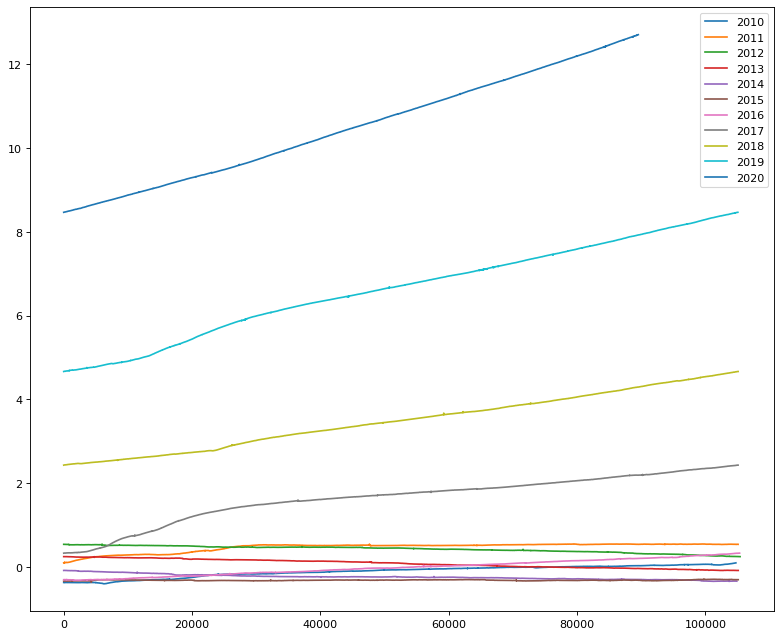

In [6]:
plt.figure(figsize=(12,10), dpi= 80)
for i in df['year'].unique():
    plt.plot(df[df.year==i]['Final_Strain'].values,label=i)
plt.legend()
plt.show()

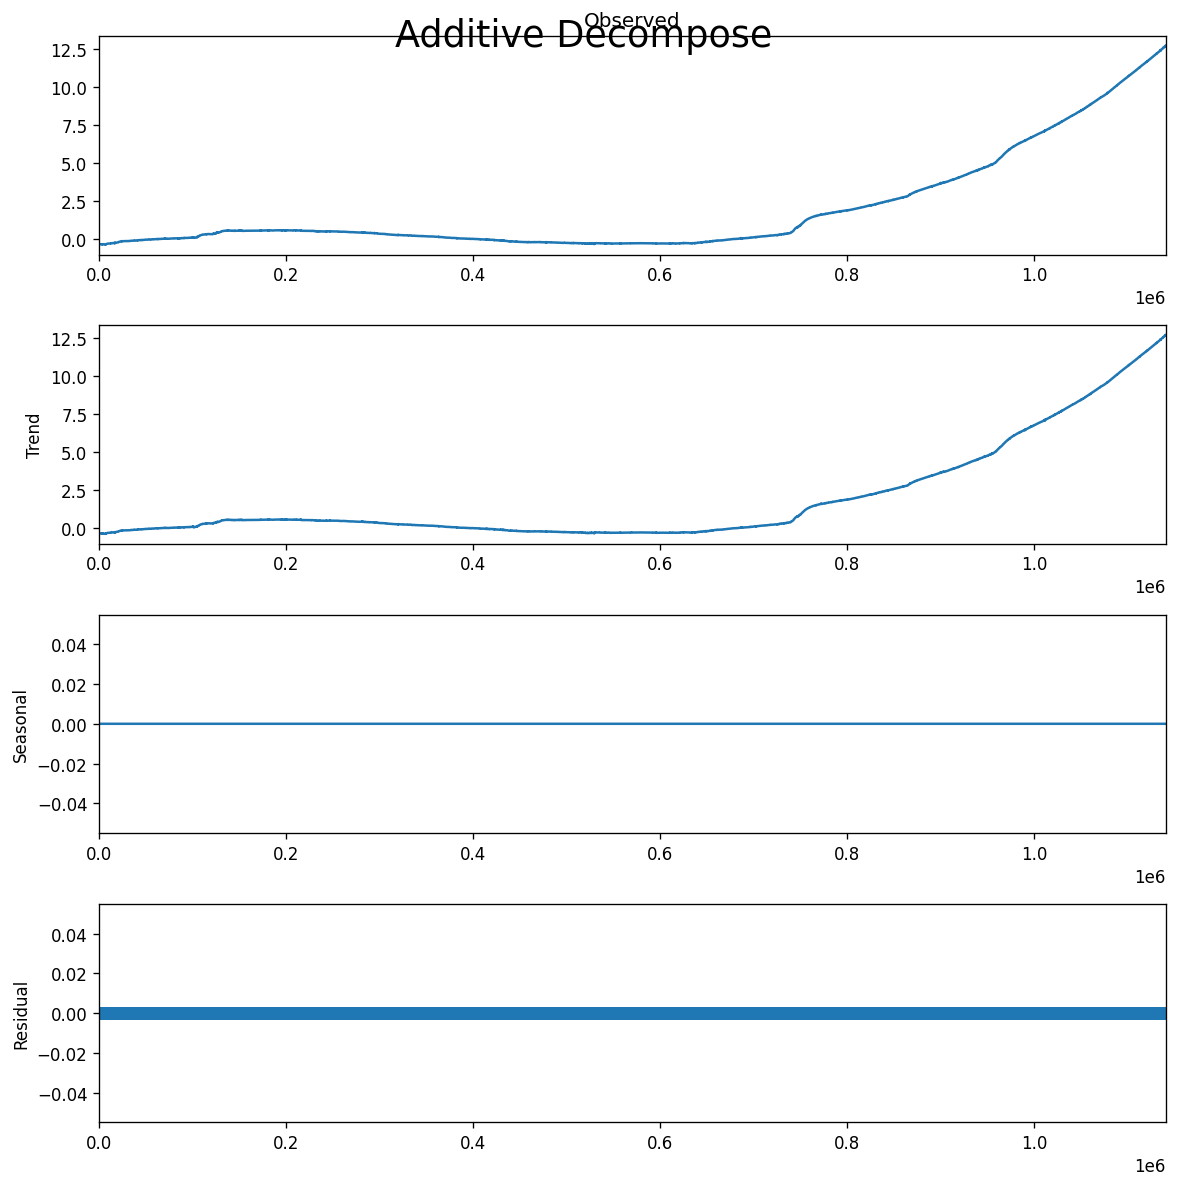

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Multiplicative Decomposition 
#result_mul = seasonal_decompose(df['Final_Strain'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['Final_Strain'].values, model='additive',extrapolate_trend='freq', period=1)
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()


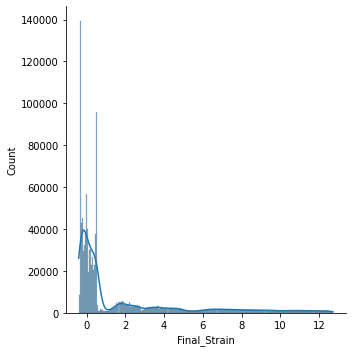

In [7]:
sns.displot(prep.initial_data['shear_strain'], x="Final_Strain", kde=True)

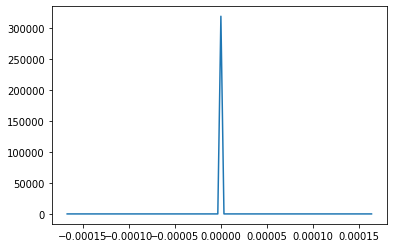

In [8]:
import numpy as np
import matplotlib.pyplot as plt

ps = np.abs(np.fft.fft(prep.initial_data['areal_strain']['Final_Strain'][:1000].values))**2

time_step =300
freqs = np.fft.fftfreq(prep.initial_data['areal_strain'][:1000].shape[0], time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx[450:550]], ps[idx[450:550]])

In [11]:
stations = ['B073','B075']
prep.load( stations = stations, 
           start_date = 2010, 
            end_date = 2017)
prep.data['year']=prep.data.index.year

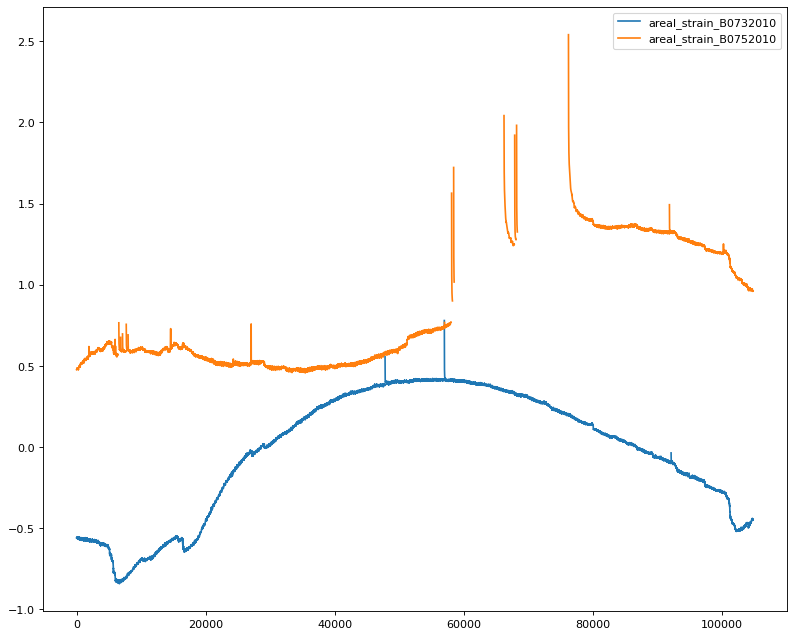

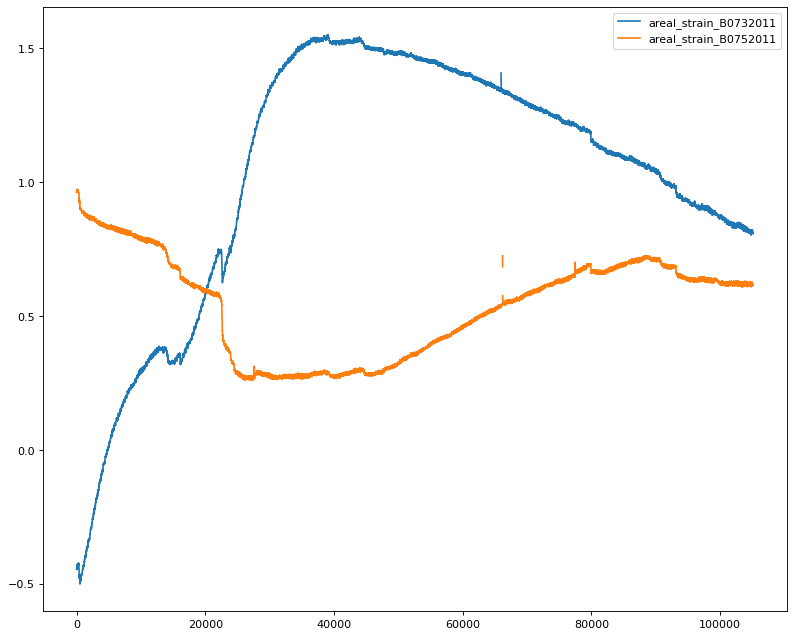

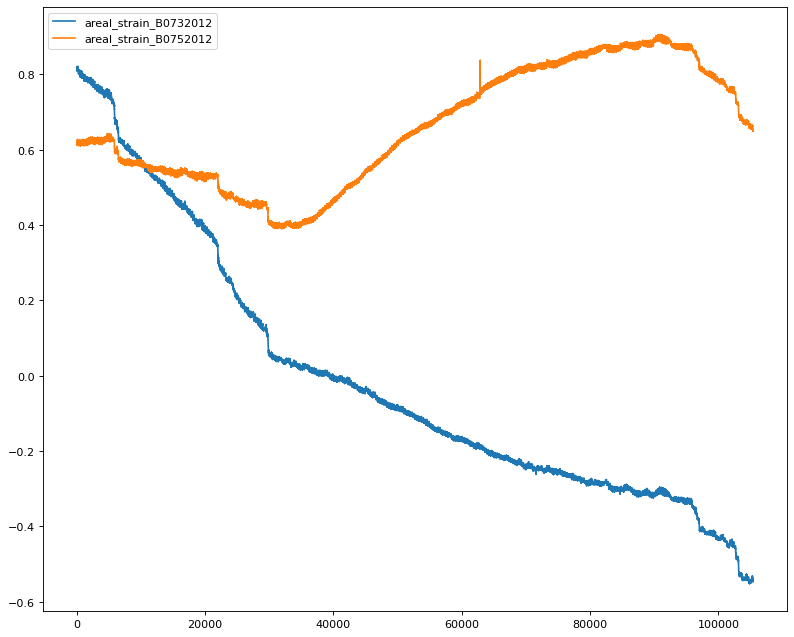

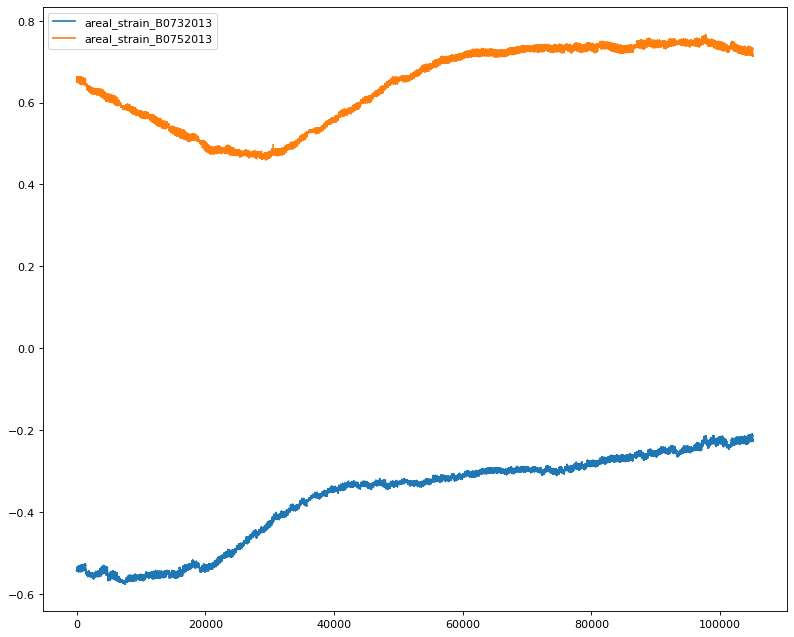

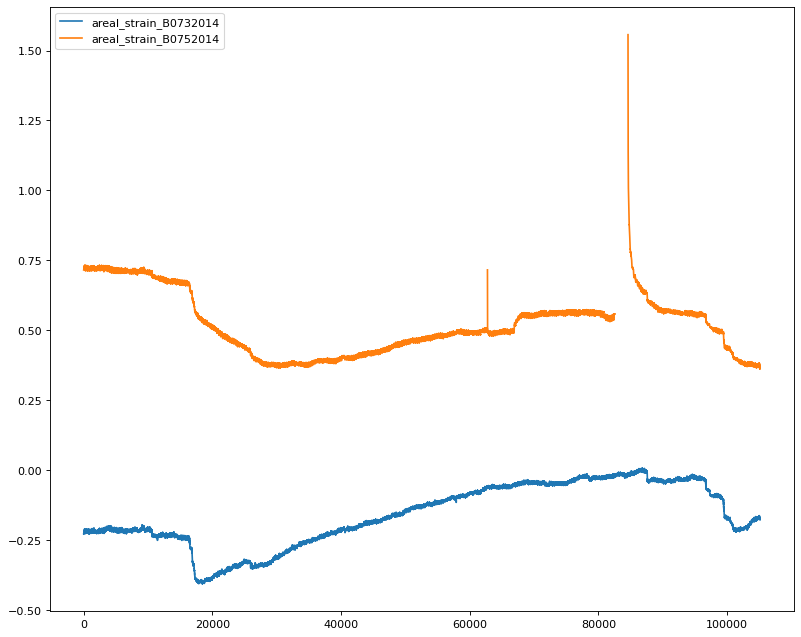

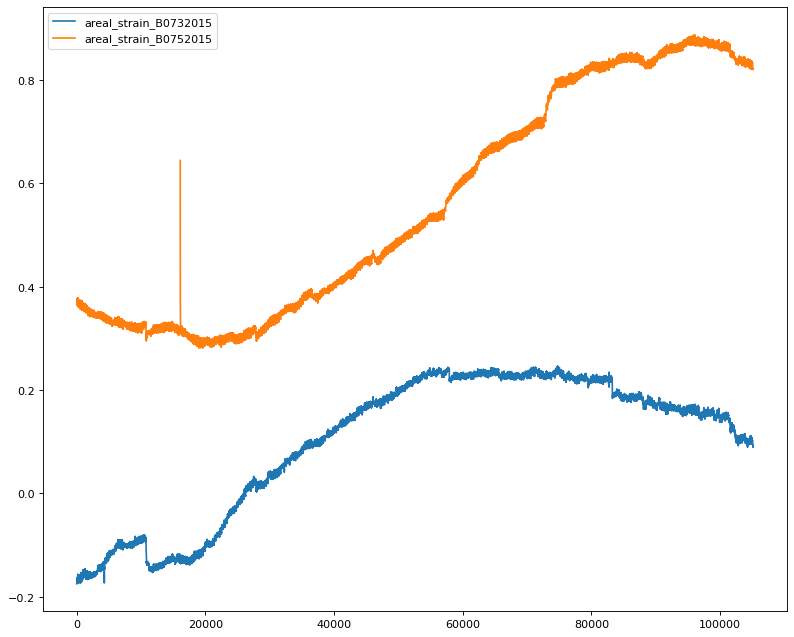

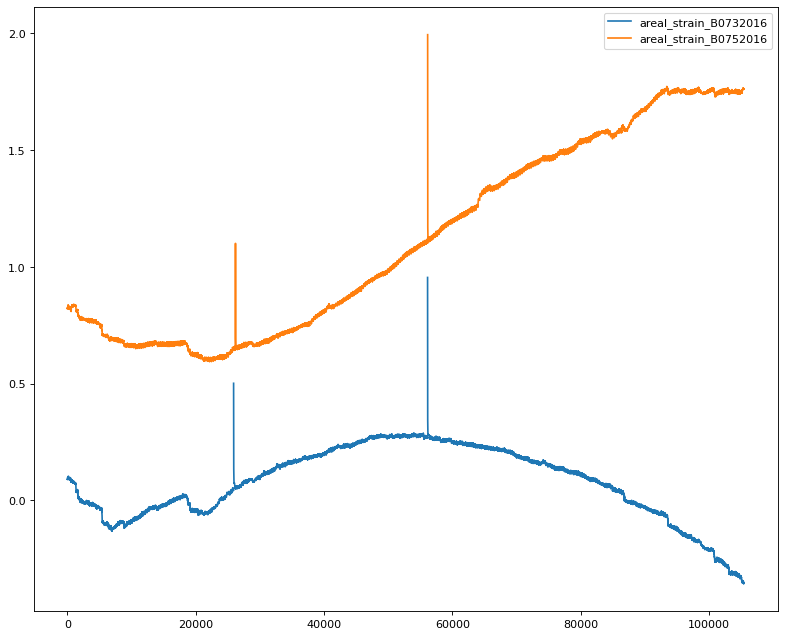

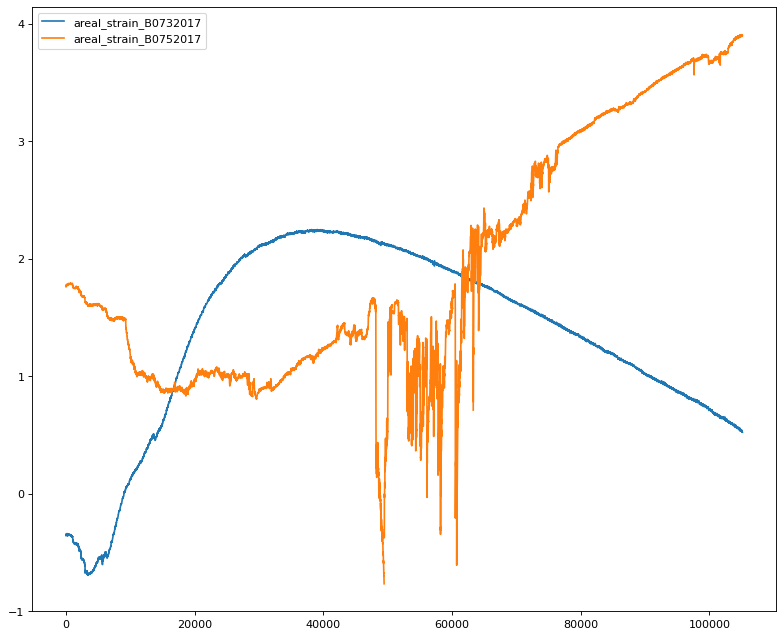

In [12]:
for j in prep.data.year.unique():
    plt.figure(figsize=(12,10), dpi= 80)
    for i in ['areal_strain_B073','areal_strain_B075']:#['areal_strain_B073','areal_strain_B075','areal_strain_B076']:
        plt.plot( prep.data[prep.data.year==j][i].values,label=i+str(j))
    plt.legend()
    plt.show()